# Uma breve introdução às Redes Neurais Recorrentes (RNN - Recurrent Neural Network)

### Universidade Federal de Lavras

##### Agosto de 2022

* Elaborado por: Victor Gonçalves Lima

* Orientado por: Prof. Denilson Alves Pereira

# Dados sequenciais (sequential data):

## Propriedades:

* A sequência pode conter elementos repetidos

* É sensível ao contexto

* O tamanho dos dados varia

## Exemplos:

* Textos

* Audio (voz e música)

* Vídeos

* Séries de dados

* Sequência de DNA

## Language models

* Generative model

* N-grams

* Context vectorizing

# Vetorização de contexto (context vectorizing)

* É um método onde os dados da sequência é dividida em um vetor.

<img src="figs/Context-vectorizing.png" width="400" title="https://neptune.ai/blog/recurrent-neural-network-guide"/>

#### Vantagens:

* A ordem é preservada
* Funciona para entradas de diferentes tamanhos
* Pode ser aplicado ***backpropagation*** e assim aprender
* O contexto é presenvado para sentenças curtas ou texto

# Arquitetura das Redes Neurais Recorrentes (RNN)

* Por conta de suas propriedades, dados sequenciais não funcionam bem com ***feed-forward networks***, que por definição trabalha com entradas de tamanho fixo.

* RNNs são modelos usados para trabalhar com ***dados sequenciais*** incorporando a técnica de ***vetorização de contexto***.

* A vetorização permite que as RNNs busque informações passadas já calculadas ao longo da sequencia, assim, as RNNs permitem a entrada de múltiplos vetores, produzindo uma mais mais saídas vetoriais.

* De uma forma simplificada, RNN são redes neurais com loops, permitindo que as informações anteriores sejam preservadas.

<img src="figs/RNN-rolled.png" width="150" title="http://colah.github.io/posts/2015-08-Understanding-LSTMs/"/>

* Desenrolando este loop, verificamos que a RNN se apresenta como múltiplas cópias da mesma rede, cada uma passando a informação para um sucessor.

<img src="figs/RNN-unrolled.png" width="800" title="http://colah.github.io/posts/2015-08-Understanding-LSTMs/"/>

## Time step *t*
* Nas RNN, *x(t)* é uma entrada na rede em um paço de tempo *t*, utilizado para indicar a ordem que uma palavra, por exemplo, ocorre na sequência.

## Hidden state *h(t)*

* Um *h(t)* representa um ***vetor contextual*** em um tempo *t* e age como uma "mémoria" da rede.

* O ***vetor contextual*** *h(t)* é calculado a partir da entrada atual *x(t)* e da entrada em uma unidade de tempo *t* anterior da ***hidden state*** *h(t-1)*.

* $h_{t} = tanh(W_{h}h_{t-1} + W_{x}x_{t})$

#### Compartilhamento de parâmetros (parameter sharing)

* Os parametros $\{W_{h}, W_{x}, W_{y}\}$ são constantes para todas as entradas da rede, permitindo que as RNN mantenham a informação contextual mesmo com variações no tamanho da sentança de entrada.

<img src="figs/Recurrent-neural-network.png" width="200" title="https://neptune.ai/blog/recurrent-neural-network-guide"/>

* RNNs compartilham os mesmos parâmetros por várias unidades de tempo.

## Predição

* A predição de uma RNN será a saída do último ***hiden state*** junto ao parâmetro de saída $W_{y}$

* Tal predição é similar a um ***problema de classificação***, e então uma função ***softmax*** é aplicada a fim de prever a saída ideal de acordo com as possiblidades.

# Treinando RNNs

## Computando os gradientes

* Durante o ***backpropagation***, a rede deve voltar cada paço de tempo para atualizar os parâmetros.

* Como prever a saída de uma RNN é um ***problema de classificação***, é utilizado ***cross-entropy*** para calcular a perda.

* **Cross-entropy:** $L_{θ}(y,y’)_{t} = -y+{t}\log{y_{t}'}$, onde $θ = \{Wh,Wx,Wy\}$.

## Backpropagation through time (BPTT)

* A rede precisa ser desenrolada para que seus parâmetros sejam diferenciados pela rede respeitando o ***time step***.

* Como a rede pega uma palavra por vez, o cálculo da perda é baseado por cada palavra.

<img src="figs/Backpropagation.png" width="400" title="https://neptune.ai/blog/recurrent-neural-network-guide"/>

# Problemas com as RNNs

* As aplicações de RNN utilizam o contexto (entradas anteriores $x_{0}$, $x_{1}$, ...) para executar sua tarefa.

<img src="figs/RNN-shorttermdepdencies.png" width="500" title="http://colah.github.io/posts/2015-08-Understanding-LSTMs/"/>

* Quanto maior a distância entre o contexto ($x_{0}$, $x_{1}$, ...) e a saída ($h_{t+1}$), mais difícil será para a RNN conectar a informação necessária.

<img src="figs/RNN-longtermdependencies.png" width="600" title="http://colah.github.io/posts/2015-08-Understanding-LSTMs/"/>

## Problemas com gradientes

###  Vanishing gradients

* Cada unidade de neurônio na rede participa do cálculo da saída, assim todos devem ter seus parâmetros atualizados a fim de minimizar os erros, voltando em todos os ***time step**.

* O vetor contextual e os parâmetros da hiden state é compartilhado por toda rede a fim de preservar a continuidade da sequência.

* No inicio do treinamento, o parâmetro é inicializado com um número aleatório próximo a zero.

* Com o ***hiden state***  sendo multiplicado por si próprio enquanto avança o ***time step***, o gradiente $W_{h}$ se torna tão pequeno e tende a zero.

* Quando menor o gradiente, mais difpicil será para a rede atualizar seus pesos, e se o gradiente for zero, os pesos para de ser atualizados.

* Com o gradiente tendendo a zero de forma exponencialmente rápida, faz com que a rede tenha dificuldades em aprender com informações muito distantes.

### Exploding gradients

* Ocore no processo de ***backpropagation*** quando gradientes altos são acumulados devido a um processo instável, resultando em atualizações muito grandes nos parâmetros.

# Long Short Term Memory (LSTM)

* São criadas na intenção de preservar informações contextuais de longa distância, perdidas em RNN tradicionais devido aos ***problemas com gradientes***.

* Ao envés de terem apenas uma camada de rede neural, LSTMs possuem quatro, interagindo de forma que preservem contextos distantes.

<img src="figs/Long-Short-Term-Memory.png" width="500" title="https://neptune.ai/blog/recurrent-neural-network-guide"/>

## Funcionamento da LSTM

##### ***Cell state:***

* É a parte ***long-term memory***, denotada por $C_{t-1}$ e recursiva.

* Permite que informações anteriores sejam armazenadas na rede LSTM.

* É modulada internamente por *gates* denominados ***forget gate*** e ***input gate***.

<img src="figs/LSTM-network-1.png" width="400" title="https://neptune.ai/blog/recurrent-neural-network-guide"/>

##### ***Forget Gate:***

* É responsável por decidir qual informação será preservada e qual será esquecida.

* Seu funcionamento é através da ***função sigmoid***.

* Olha o estado inicial em $h_{t-1}$ e $x_{t}$ e retorna um número entre 0 e 1 para cada ***cell state*** $C_{t-1}$.

* Se a informação retornada for 1, ele guarda a informação, e se retornar 0, ele apaga.

<img src="figs/LSTM-network-2.png" width="500" title="https://neptune.ai/blog/recurrent-neural-network-guide"/>

##### ***Input gate:***

* Pega a mesma entrada $x_{t} do estado inicial $h_{t-1}$.

* Passa por duas ***funções de ativação***: ***sigmoid*** e ***tanh***.

* O retorno se torna candidato para $C_{t}$.

* Assim, ajuda o ***cell state*** salvar novas informações e atuaizar de $C_{t-1}$ à $C_{t}$.

<img src="figs/LSTM-network-3.png" width="500" title="https://neptune.ai/blog/recurrent-neural-network-guide"/>


##### ***Output gate:***

* É baseado no ***cell state*** $C_{t}$, o ***hiden state*** inicial $h_{t-1}$ e a entrada $x_{t}$.

* $h_{t-1}$ e $x_{t}$ são passados pela ***sigmoid***, com retorno entre 0 e 1.

* Simultaneamente, $C_{t}$ é passado pela ***tanh***, com retorno entre -1 e 1.

* A informação passada para o próximo ***hiden state*** é a multiplicação dos retornos das ***funções de ativação*** calculadas.

<img src="figs/LSTM-network-4.png" width="500" title="https://neptune.ai/blog/recurrent-neural-network-guide"/>

## Bidirectional LSTM (Bi-LSTM)

* Diferente das ***LSTMs*** unidirecionais, permite obter informações sequenciais em ambas direções (passado e futuro do ***time step***).

<img src="figs/Bi-LSTM.jpg" width="800" title="https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/"/>

# Gated Recurrent Unit (GRU)

* É uma versão modificada da ***LSTM*** com menor complexidade.

* Utilizam ***hiden state*** no lugar de ***cell state*** para tranferir informações.

* Possuem dois ***gates***: ***reset gate*** e ***update gate***.

* São mais rápidos que as ***LSTM***.

<img src="figs/Gated-Recurrent-Unit.webp" width="500" title="https://neptune.ai/blog/recurrent-neural-network-guide"/>

##### ***Update gate***:

* Seleciona as informações que precisam ser adicionadas e/ou ignoradas

##### ***Reset gate***:

* Decide o quanto de informações anteriores serão esquecidas

# Next word prediction using Bi-LSTM

Adaptado de: https://www.kaggle.com/code/ysthehurricane/next-word-prediction-bi-lstm-tutorial-easy-way

## Pacotes

In [1]:
import pandas as pd
import os
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

## Dataset e pré-processamento dos dados

* O dataset contèm informações de artigos escolhidos de forma aleatória publicados em 2019.

* Os dados utilizados para treinamento serão os títulos desses artigos.

* Fonte: https://www.kaggle.com/datasets/dorianlazar/medium-articles-dataset

In [2]:
medium_data = pd.read_csv('./medium-articles-dataset/medium_data.csv')
medium_data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [3]:
print("Número de artigos: ", medium_data.shape[0])
print("Número de atributos: ", medium_data.shape[1])

Número de artigos:  6508
Número de atributos:  10


In [4]:
medium_data['title']

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6508, dtype: object

#### Removendo caracteres e palavras indesejadas nos títulos

In [5]:
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace(u'\xa0',u' '))
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace('\u200a',' '))

#### Tokenzation

* É o processo de indexar todas as palavras com uma identificação numérica única

In [6]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(medium_data['title'])
total_words = len(tokenizer.word_index) + 1

In [7]:
print("Número total de palavras: ", total_words)
print(tabulate([['Artificial', tokenizer.word_index['artificial']],
                ['Neural', tokenizer.word_index['neural']],
                ['Network', tokenizer.word_index['network']]], headers=['Word', 'ID']))

Número total de palavras:  8238
Word          ID
----------  ----
Artificial   106
Neural        81
Network      164


#### Transformar textos em sequências e gerar modelos ***n-grams***

In [8]:
input_sequences = []
for line in medium_data['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


In [9]:
print("Número de sequências de entrada: ", len(input_sequences))

Número de sequências de entrada:  48461


#### Padronizar sequências para terem o mesmo tamanho usando ***padding***

In [10]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 676,
        68], dtype=int32)

## Rotular e preparar dados de treinamento

In [11]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

## Definição e compilação do modelo

In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)

2022-08-15 09:13:58.346208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-15 09:13:58.376170: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-15 09:13:58.376305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-15 09:13:58.376886: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

## Treinamento do modelo

In [14]:
history = model.fit(xs, ys, epochs=50, verbose=1)

Epoch 1/50
   1/1515 [..............................] - ETA: 1:00:23 - loss: 9.0166 - accuracy: 0.0000e+00

2022-08-15 09:14:43.335709: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-08-15 09:14:43.418107: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1515/1515 [==============================] - 11s 6ms/step - loss: 6.7863 - accuracy: 0.1239
Epoch 2/50
1515/1515 [==============================] - 9s 6ms/step - loss: 5.8081 - accuracy: 0.1763
Epoch 3/50
1515/1515 [==============================] - 9s 6ms/step - loss: 4.9853 - accuracy: 0.2017
Epoch 4/50
1515/1515 [==============================] - 9s 6ms/step - loss: 4.2160 - accuracy: 0.2476
Epoch 5/50
1515/1515 [==============================] - 9s 6ms/step - loss: 3.6464 - accuracy: 0.2998
Epoch 6/50
1515/1515 [==============================] - 9s 6ms/step - loss: 3.2778 - accuracy: 0.3396
Epoch 7/50
1515/1515 [==============================] - 9s 6ms/step - loss: 3.0243 - accuracy: 0.3714
Epoch 8/50
1515/1515 [==============================] - 9s 6ms/step - loss: 2.8868 - accuracy: 0.3908
Epoch 9/50
1515/1515 [==============================] - 9s 6ms/step - loss: 2.7081 - accuracy: 0.4153
Epoch 10/50
1515/1515 [==============================] - 9s 6ms/step - loss: 2.6059 - accura

## Estatísticas do treinamento

In [15]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

##### ***accuracy:***

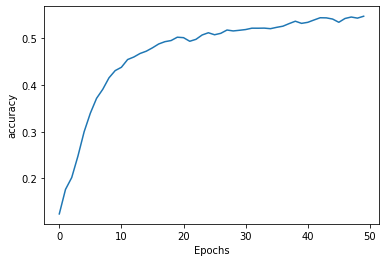

In [16]:
plot_graphs(history, 'accuracy')

##### ***loss:***

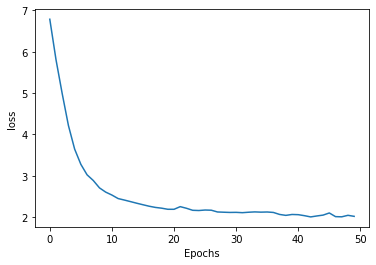

In [17]:
plot_graphs(history, 'loss')

## Salvar modelo

In [18]:
model.save('./medium-articles-model')

INFO:tensorflow:Assets written to: ./medium-articles-model/assets


INFO:tensorflow:Assets written to: ./medium-articles-model/assets


## Carregar modelo

In [19]:
model = keras.models.load_model('./medium-articles-model')

## Predizendo a próxima palavra

In [21]:
input_sentence = input()
predicted_sentence = input_sentence

next_words = 2

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([predicted_sentence])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = tokenizer.index_word[np.argmax(model.predict(token_list, verbose=0))]
    predicted_sentence += " " + predicted

output = "Entrada: " + input_sentence
for _ in range(next_words):
    output += " ___"
print(output)
print("Predição: " + predicted_sentence)

Entrada: This is a study in recurrent ___ ___
Predição: This is a study in recurrent neural networks


# Referências

- https://neptune.ai/blog/recurrent-neural-network-guide

- https://www.analyticsvidhya.com/blog/2021/07/in-depth-explanation-of-recurrent-neural-network/

- http://colah.github.io/posts/2015-08-Understanding-LSTMs/

- http://karpathy.github.io/2015/05/21/rnn-effectiveness/

- https://analyticsindiamag.com/lstm-vs-gru-in-recurrent-neural-network-a-comparative-study/

- https://www.tensorflow.org/guide/keras/rnn

- https://www.kaggle.com/code/ysthehurricane/next-word-prediction-bi-lstm-tutorial-easy-way

- https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/